# Tutorial 2

With this tutorial, we will jump into the `pytorch` Autograd functionality and further implement the Softmax Regression.

## 1. Autograd

Let

$$\begin{align}
f:\mathbb{R} &\to\mathbb{R}\\
x&\mapsto 0.7x^4+4\sin(x)-0.5x^3
\end{align}.$$

a) Plot $f(x)$ for $x \in [- 2.5,2.5]$.

b) Use the `pytorch` package to calculate the gradient of $f$ in $x = 2.5$. (Hint: `.backward()`)

c) Use gradient descent (with a stepsize of $0.1$ and $20$ steps) to find the minimum.

d) Modify your code of c) to log the values after each step and plot points for each step of gradient descent (Hint: `pyplot.scatter`, see [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)).

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-2.5, 2.51, step=0.01)
f_x = 0.7 * torch.pow(x, 4) + 4 * torch.sin(x) - 0.5 * torch.pow(x, 3)

Text(0.5, 1.0, 'f(x)')

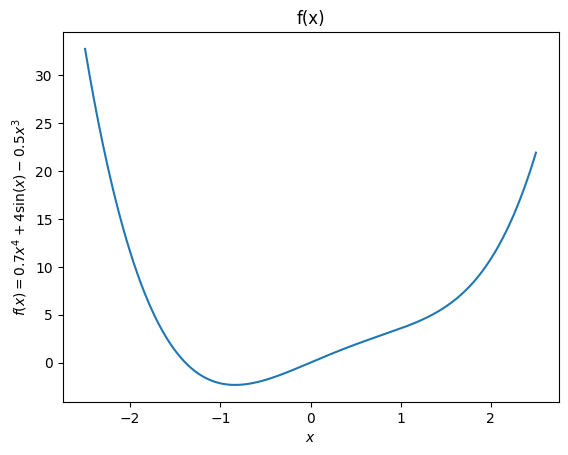

In [ ]:
plt.plot(x, f_x)
plt.xlabel("$x$")
plt.ylabel("$f(x) = 0.7x^4+4\sin(x)-0.5x^3$")
plt.title("f(x)")

## b)

In [ ]:
x0 = torch.tensor([2.5], requires_grad=True)
f_x0 = 0.7 * torch.pow(x0, 4) + 4 * torch.sin(x0) - 0.5 * torch.pow(x0, 3)

In [ ]:
f_x0

tensor([21.9251], grad_fn=<SubBackward0>)

In [ ]:
f_x0.backward()

In [ ]:
x0.grad

tensor([31.1704])

In [ ]:
x0.grad.zero_()
x0.grad

tensor([0.])

In [ ]:
f_x0

tensor([21.9251], grad_fn=<SubBackward0>)

In [ ]:
f_x0

tensor([21.9251], grad_fn=<SubBackward0>)

In [ ]:
torch.manual_seed(42)
x_0 = torch.tensor([2.5], requires_grad=True)
lr = 0.05

x_steps = torch.tensor([2.5])
f_x_steps = 0.7 * torch.pow(x_0, 4) + 4 * torch.sin(x_0) - 0.5 * torch.pow(x_0, 3)

for i in range(20):
  f_x0_loop = 0.7 * torch.pow(x_0, 4) + 4 * torch.sin(x_0) - 0.5 * torch.pow(x_0, 3)
  f_x0_loop.backward()
  with torch.no_grad():
    x_0 -=  lr * x_0.grad
    # x_0 = x_0 - lr * x_0.grad funktioniert nicht.
    x_steps = torch.cat((x_steps, x_0))
    f_x_steps = torch.cat((f_x_steps, 0.7 * torch.pow(x_0, 4) + 4 * torch.sin(x_0) - 0.5 * torch.pow(x_0, 3)))
  x_0.grad.zero_()

print(x_0)

tensor([-0.8357], requires_grad=True)


Text(0.5, 1.0, 'f(x)')

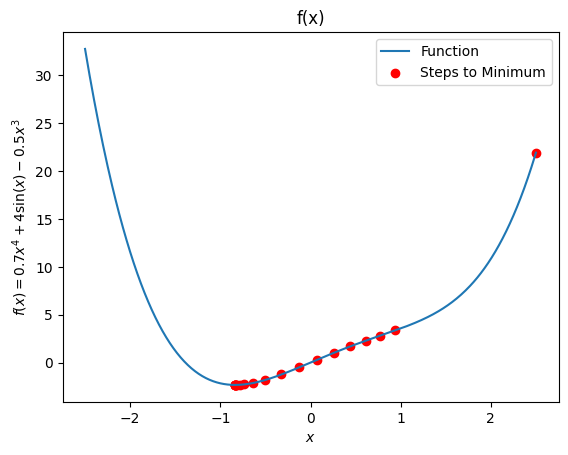

In [ ]:
plt.plot(x, f_x, label="Function")
plt.scatter(x_steps, f_x_steps, label="Steps to Minimum", color="red")
plt.xlabel("$x$")
plt.ylabel("$f(x) = 0.7x^4+4\sin(x)-0.5x^3$")
plt.legend()
plt.title("f(x)")



```
# Als Code formatiert
```

## 2. Softmax Regression

### Dataset

At first load the [breast-cancer-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset) from [Scikit-learn](https://scikit-learn.org/stable/index.html) and split it into training and testing set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import torch

In [ ]:
features, labels = load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

X_train= torch.tensor(X_train, dtype = torch.float)
Y_train= torch.tensor(Y_train, dtype = torch.long)
X_test= torch.tensor(X_test, dtype = torch.float)
Y_test= torch.tensor(Y_test, dtype = torch.long)

Take a look at the [documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset) of the dataset. How many observations and features are included? What are the features? How many different classes exist? etc.

* How is the benign class encoded?

In [ ]:
labels.sum()
features.shape

# -> 1 = Gutartig, 2 = Bösartig

(569, 30)

### Softmax Regression from Scratch

In a classification problem with $K$ classes, we can represent the outcome space as $\mathcal{Y}:=\{1,\dots,K\}$ (or $\{0,\dots,K-1\}$).<br>
The softmax regression model assumes that the conditional probablilty
$$ P(Y=j|X=x)= \frac{\exp(w_j^Tx+b_j)}{\sum_\limits{k=1}^{K}\exp(w_k^Tx+b_k)}$$
for all $j=\{1,\dots,K\}$. This is a combination of $K$ linear functions and the softmax function (normalized exponential function)
$$\begin{align}
\text{softmax}:\mathbb{R}^K&\to [0,1]^K\\
\begin{pmatrix}x_1\\ \vdots \\ x_K\end{pmatrix}&\mapsto\left(\frac{\exp(x_1)}{\sum_\limits{k=1}^{K}\exp(x_k)},\dots,\frac{\exp(x_K)}{\sum_\limits{k=1}^{K}\exp(x_k)}\right)^T.
\end{align}$$

* First, start by initializing the weights as in the lecture (use the seed $42$). How many weights do we need?
* Next, define a sofmax function, which takes in a $m\times p$ dimensional tensor and applies the softmax function for each row (the broadcasting mechanism can simplify your solutions). The result should be an $m\times p$ dimensional tensor of probabilities, which sum up to $1$.
* Use the weights and the softmax-function to define a softmax regression function, which returns the estimated conditional probablities for each class. Try the model on the first three observations of your training set.
* What would your final prediction look like, according to these probabilities (for implementation `torch.max`, see [documentation](https://pytorch.org/docs/stable/generated/torch.max.html), might be helpful)? How do the true labels look like (to compare both use `torch.eq`)?
* Evaluate the random model on your training and test set by evaluating the accuarcy (share of correct predictions).

For training, we will need another loss function (why?).

In [ ]:
# K (= 2) * dim(X) (= 30) = 60

torch.manual_seed(420)
weights = torch.normal(0, 0.01, size=(30, 2), requires_grad=True)
weights

tensor([[-7.0426e-05,  5.0445e-03],
        [ 6.7037e-03, -3.8286e-03],
        [ 3.0239e-04,  3.8263e-03],
        [-5.1312e-03,  7.1042e-03],
        [ 1.8092e-02,  4.3523e-03],
        [ 2.6453e-02,  2.6535e-03],
        [ 9.2350e-03, -4.3756e-03],
        [ 2.0182e-02,  1.3498e-02],
        [-2.5230e-03, -3.5503e-04],
        [-6.4552e-04, -5.9176e-03],
        [ 9.3828e-04, -2.0492e-02],
        [ 1.0550e-02, -6.2219e-03],
        [-8.8593e-03,  1.4945e-03],
        [ 7.6840e-03,  4.0664e-03],
        [ 1.3646e-02, -7.3723e-03],
        [-7.0839e-03, -2.8423e-03],
        [ 1.6243e-02, -3.2217e-03],
        [ 2.2995e-03, -9.6751e-03],
        [-6.3356e-03,  7.5658e-03],
        [ 3.5237e-03,  6.1256e-03],
        [ 7.7488e-03, -1.7884e-03],
        [-4.1555e-03, -4.4766e-03],
        [ 1.9852e-02, -1.0167e-02],
        [ 4.8575e-03,  5.4278e-03],
        [ 1.1482e-03, -6.6702e-03],
        [ 6.0057e-03,  6.7183e-03],
        [ 8.8420e-03, -2.4602e-03],
        [-1.1771e-02,  1.924

In [ ]:
bias = torch.zeros(2, requires_grad=True)
bias

tensor([0., 0.], requires_grad=True)

In [ ]:
def softmax(X):
  X_exp = torch.exp(X)
  X_exp_sum = X_exp.sum(1, keepdim=True)
  return X_exp / X_exp_sum

In [ ]:
def model(X, weights, bias):
  lin_input = torch.matmul(X, weights) + bias
  return softmax(lin_input)

In [ ]:
output_test = model(X_train, weights, bias)

In [ ]:
pred_labels = torch.max(output_test.data, 1).indices

In [ ]:
pred_labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
torch.eq(pred_labels, Y_train)

tensor([ True, False,  True, False, False, False,  True, False,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False,  True, False,  True,  True,
         True,  True, False,  True,  True, False,  True,  True,  True, False,
         True, False, False,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False,  True, False,
        False,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False, False, False,  True,  True, False,  True,  True, False,
         True, False,  True, False,  True, False,  True,  True, False,  True,
         True,  True, False,  True, False,  True, False,  True, False,  True,
         True, False,  True,  True,  True,  True, False,  True, 

In [ ]:
torch.eq(pred_labels, Y_train).sum() / len(pred_labels)

tensor(0.6291)

### Cross-Entropy

At first try the cross entropy loss

$$\begin{align}
l:&\mathcal{Y}_K\times[0,1]^K\to \mathbb{R}^+ \\
&(y_1,y_2)\mapsto -\sum_{j=1}^K y_{1,j} \log(y_{2,j}). \end{align}$$

Remark that the outcome is not encoded in one-hot-encoding (as in the formula). This might be helpful to implement the loss concisely. Hint:

In [ ]:
y = torch.tensor([0, 1, 0]) # three samples with corresponding classes 0,1 and 0
y_hat = torch.tensor([[0.3, 0.7], [0.5, 0.5],[0.8, 0.2]])# three predictions with corresponding probablities
y_hat[[0, 1, 0], y]

tensor([0.3000, 0.5000, 0.3000])

In [ ]:
def cross_entropy(y_true, y_hat):
  return - torch.log(y_hat[range(len(y_hat)), y_true])

In [ ]:
y_hat

tensor([[0.3000, 0.7000],
        [0.5000, 0.5000],
        [0.8000, 0.2000]])

In [ ]:
cross_entropy(y_true=y, y_hat=y_hat)

tensor([1.2040, 0.6931, 0.2231])

In [ ]:
cross_entropy(y_true=Y_train, y_hat=output_test.data).mean()

tensor(3.1335)

In [ ]:
avg_train_loss = cross_entropy(y_true=Y_train, y_hat=model(X_train, weights, bias)).mean()

In [ ]:
avg_train_loss.backward()

In [ ]:
lr = 0.01
with torch.no_grad():
  weights -= lr * weights.grad
  bias -= lr * bias.grad
  weights.grad.zero_()
  bias.grad.zero_()

In [ ]:
model(X_train, weights, bias)[:3]

tensor([[nan, 0.],
        [nan, 0.],
        [nan, 0.]], grad_fn=<SliceBackward0>)

It holds:
$$\begin{align}
\text{crossentropy}(\text{softmax}(x),y)&=\text{crossentropy}\left(\left(\frac{\exp(x_1)}{\sum_\limits{k=1}^{K}\exp(x_k)},\dots,\frac{\exp(x_K)}{\sum_\limits{k=1}^{K}\exp(x_k)}\right)^T,y\right)\\
&=-\log\left(\frac{\exp(x_j)}{\sum_\limits{k=1}^{K}\exp(x_k)}\right)\\
&=\log\left(\sum\limits_{k=1}^{K}\exp(x_k)\right)-x_j\\
&\approx\max_k x_k-x_j
\end{align}$$

This helps to prevent over- and and underflow. (Overflow since $exp(x)$ might be very large and therefore result in `inf` or underflow since $log(x)$ might result in `-inf`.)

In [ ]:
torch.manual_seed(420)
weights = torch.normal(0, 0.01, size=(30, 2), requires_grad=True)
bias = torch.zeros(2, requires_grad=True)

def model_2(X, weights, bias):
  return torch.matmul(X, weights) + bias

In [ ]:
def loss(y_true, y_hat):
  return torch.max(y_hat, dim=1)[0] - y_hat[range(len(y_hat)), y_true]

In [ ]:
predictions_2 = model_2(X_train, weights, bias)

In [ ]:
avg_train_loss_2 = loss(y_true=Y_train, y_hat=predictions_2).mean()

In [ ]:
avg_train_loss_2.backward()

In [ ]:
lr = 0.01
with torch.no_grad():
  weights -= lr * weights.grad
  bias -= lr * bias.grad
  weights.grad.zero_()
  bias.grad.zero_()

In [ ]:
torch.max(model_2(X_train, weights, bias), dim=1).indices

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

* Next, try to calculate the average loss on the training sample.
* Calculate the gradient to obtain the gradient of the weights and update the weights with learning rate $0.01$. Here we dont need to use stochastic gradient descent, since the sample is quite small.
* Try to predict new probabilities $\hat{y}$ for the training observations. What does go wrong? (depends on the initialization).
* What happens if you combine the softmax function and the cross entropy function (try to calculate the solution analytically, assuming that the true outcome is the $j$-th class)?<br> Use the the ["LogSumExp trick"](https://en.wikipedia.org/wiki/LogSumExp): $\log\left(\sum_j \exp(x_j)\right)\approx\max_j x_j$.
* Now try to reinitialize the weights and use the results from the previous exercise to train your regression model. (Define a function which specifies $loss(x,y)= \max_k x_k-x_j$).
* Next, evaluate the accuracy on your trained model. Do you really need to apply the `softmax` function to determine which is the most probable class?
* Is it always a good idea to return the most likely label? Especially in this example?

### Concise Implementation of Softmax Regression

In this exercise, we will implement the training using SGD.

\* Next, construct a `DataLoader` (to apply SGD) for the training set by using `torch.utils.data.DataLoader` and set a seed for the random number generator. Additionally, create an `DataLoader` for the test set.
* Read through the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) of `nn.CrossEntropyLoss` to create the loss. Furhter use `nn.Sequential` and `nn.Linear` to create the model.
* Initialize the weights of your model and try to evaluate the accuracy using the `DataLoader`.
* Now train your model and save the loss and accuracy in each epoch (on the training and on the test set). Here, `reduction = 'sum' ` might be helpful for the loss.
* Try to create two plots displaying the accuracy and the losses.

In [ ]:
from torch.utils import data

def construct_dataloader(dataset, batch_size, shuffle):
  torch_dataset = data.TensorDataset(*dataset)
  return data.DataLoader(torch_dataset, batch_size, shuffle)

In [ ]:
batch_size = 4

train_loader = construct_dataloader((X_train, Y_train), batch_size, shuffle=True)
test_loader = construct_dataloader((X_test, Y_test), batch_size, shuffle=False)

In [ ]:
from torch import nn

reg = nn.Sequential(nn.Linear(30, 2))
loss = nn.CrossEntropyLoss(reduction="sum")

In [ ]:
def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.normal_(m.weight, std=0.01)

In [ ]:
reg.apply(init_weights)

Sequential(
  (0): Linear(in_features=30, out_features=2, bias=True)
)

In [ ]:
reg[0].weight

Parameter containing:
tensor([[-0.0080, -0.0147,  0.0272,  0.0019,  0.0113,  0.0030, -0.0003, -0.0071,
         -0.0040,  0.0139,  0.0033, -0.0043,  0.0004, -0.0114,  0.0014, -0.0043,
          0.0115,  0.0157, -0.0063, -0.0067, -0.0153, -0.0042,  0.0071,  0.0117,
          0.0028,  0.0143,  0.0061, -0.0222, -0.0006, -0.0087],
        [-0.0023, -0.0183,  0.0099,  0.0124,  0.0092, -0.0141,  0.0049, -0.0016,
         -0.0074, -0.0029,  0.0034, -0.0124, -0.0080, -0.0162,  0.0107,  0.0155,
         -0.0219,  0.0096, -0.0024,  0.0109,  0.0076,  0.0072,  0.0005, -0.0134,
         -0.0052,  0.0060, -0.0026,  0.0063,  0.0171,  0.0239]],
       requires_grad=True)

In [ ]:
correct_train = 0
correct_test = 0

with torch.no_grad():
  for X, Y in train_loader:
    predictions = reg(X).data.max(1)[1]
    correct_train += predictions.eq(Y).sum()
  for X, Y in test_loader:
    predictions = reg(X).data.max(1)[1]
    correct_test += predictions.eq(Y).sum()

print("Accuracy for train set: ", correct_train / len(Y_train))
print("Accuracy for test set: ", correct_test / len(Y_test))

Accuracy for train set:  tensor(0.3709)
Accuracy for test set:  tensor(0.3776)


In [ ]:
trainer = torch.optim.SGD(reg.parameters(), lr=0.00001)

In [ ]:
train_acc = []
test_acc = []
train_loss = []
test_loss = []

correct_train = 0
loss_train = 0
correct_test = 0
loss_test = 0

num_epoch = 50

for epoch in range(num_epoch):
  correct_train = 0
  loss_train = 0
  for X, Y in train_loader:
    predictions = reg(X).data.max(1)[1]
    correct_train += predictions.eq(Y).sum()
